# Food Safety

Exploration of the [Food Standards Agency's Data](http://ratings.food.gov.uk/) for Glasgow Establishments.
The data for this analysis was downloaded using the code in ./data/data_download.ipynb

### Importing the library
"pd" is the common short name given to the pandas library

In [1]:
import pandas as pd

If looking for a deeper look at getting started in pandas, there is 2017 SciPy talk [here](https://github.com/chendaniely/scipy-2017-tutorial-pandas)

For a quick overview, I recommend the [Cheat Sheet](http://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

### Opening a Comma Separated Value file
The **read_csv** function can also handle most tipes of flat files (i.e. stuff you can read with your favourite notepad application) provided that correct parametres are passed. The method handels skipping rows, parsing dates from different columns, differnt encodings, zipped sources and more.

For the full documentation: [read_csv docs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)

In [3]:
df = pd.read_csv('data/food_safety_Glasgow.csv')

### Exploring the data
There are many ways to explore the data. Some of the simplest are:

```python
    df             # showing the "full" dataset
    df.shape       # checking the size of the dataset
    df.head(2)     # looking at first 2 rows. For last rows use df.tail()
    df.loc[639]    # grabbing a sample row (using index label) 
    df.iloc[639]   # grabbing a sample row (using integer-location index)
    df.columns     # looking at all column names
    df.info()      # summary non-nulls and types for each column
    df.describe()  # basic statistics (only for the numeric columns)
```

In [7]:
df.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
0,1054130,18/00242/COM,#43,Restaurant/Cafe/Canteen,1,150 Old Dalmarnock Road,Glasgow,G40 4LH,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.219406,55.843804,NaN
1,946085,15/00071/COM,(DC1) Donut Coffee (Supreme Group),Mobile caterer,7846,105 Clydeholm Road,Glasgow,G14 0QQ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.337705,55.870607,NaN
2,36328,10/00926/COM,(Nisa) News 24,Retailers - other,4613,68 Gordon Street,Glasgow,G1 3RS,Improvement Required,fhis_improvement_required_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.257722,55.860794,NaN
3,19429,06/00508/COM,(Starbucks),Restaurant/Cafe/Canteen,1,390 Provan Walk,Glasgow,G34 9DL,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.136909,55.872982,NaN
4,36363,10/01018/COM,1 Call Direct Staff Canteen,Restaurant/Cafe/Canteen,1,116 West Regent Street,Glasgow,G2 2QD,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,-4.258732,55.863606,Storey Ground


In [4]:
df.loc[639:642, ['BusinessName','Latitude']]

,BusinessName,Latitude
639,Butterfly And The Pig (and Tea Room),55.864192
640,Butterfly Catering,55.798755
641,Butterfly Nursery,55.804968
642,Buttons And Bows Nursery,55.843210


Where did all the other columns go? They are non-numeric :(

### Let's do some plotting
pandas uses matplotlib in the backend to give useful plot with one or few lines of code leaving the user with the possiblity to use pure matplotlib for more customized stuff.

For more info on [pandas visualization, go here.](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

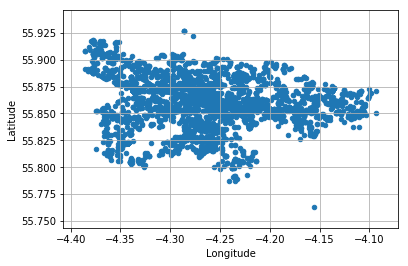

In [8]:
# uncomment to visualize matplotlib plots in the notebook (only need to run it once per notebook... usually with the imports)
%matplotlib inline  

df.plot('Longitude', 'Latitude', kind='scatter', grid=True)

In [6]:
df[df.Longitude>0]

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,Scores,SchemeType,NewRatingPending,Longitude,Latitude,AddressLine1
93,905249,16/00516/COM,Al Sultan,Restaurant/Cafe/Canteen,1,61 Bridge Street,Glasgow,NaN,Pass,fhis_pass_en-GB,...,776,Glasgow City,http://www.glasgow.gov.uk,food.safety@glasgow.gov.uk,NaN,FHIS,False,0.11797,52.208875,Storey 1 - 3


In [7]:
# From a quick google maps search: 61 Bridge St, Glasgow G5 9JB  => 55.853033, -4.258319
df.loc[93, 'Longitude'] = -4.258319
df.loc[93, 'Latitude'] = 55.853033

In [ ]:
is_missing_lat = pd.isnull(df.Latitude)
df = df[~is_missing_lat]

### Want more fancy plotting?

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
m = folium.Map(
    location=[55.863823, -4.267681],
    zoom_start=12,
    tiles='cartodbpositron'
)

rating_color={
    'fhis_awaiting_inspection_en-GB': 'gray',
    'fhis_improvement_required_en-GB': 'red',
    'fhis_pass_en-GB': 'yellow',
    'fhis_pass_and_eat_safe_en-GB': 'green',
}

for _, row in df.iterrows():   
    info_txt = "<b>{}</b><br>(<i>{}</i>, {})".format(row.BusinessName.replace("'", "`"), row.RatingValue, row.RatingDate)
    folium.Circle(
        radius=3,
        location=[row.Latitude, row.Longitude],
        tooltip=info_txt,
        color='black',
        weight=0.5,
        fill_opacity=0.8,
        fill_color=rating_color[row.RatingKey],
        fill=True,
    ).add_to(m)
    
m   # FYI: for some reason this one is rendered only on Firefox

### Let's bring some heat

In [ ]:
m = folium.Map(
    location=[55.863823, -4.267681],
    zoom_start=12,
    tiles='cartodbpositron'
)

data_needing_improvements = df.loc[df.RatingValue == 'Improvement Required', ['Latitude', 'Longitude']].values
data_pass_plus = df.loc[df.RatingValue == 'Pass and Eat Safe', ['Latitude', 'Longitude']].values

HeatMap(data=data_needing_improvements, name='need_improvements', show=False).add_to(m)
HeatMap(data=data_pass_plus, name='pass_plus', show=False).add_to(m)
folium.LayerControl().add_to(m)

m

### Combining data

In [ ]:
df_yelp_matched = pd.read_csv('data/yelp_matched.csv')
df_yelp_matched.head()

In [ ]:
df_combined = pd.merge(left=df, right=df_yelp_matched, on='FHRSID')
df_combined.head()

In [ ]:
df_combined.iloc[0]

In [ ]:
qdf = df_combined[['rating', 'review_count']].copy()

qdf['price'] = df_combined['price'].fillna('').apply(len).replace(0, pd.np.nan)

qdf['fsa_rating'] = df_combined['RatingValue'].apply(
    ['Improvement Required', 'Awaiting Inspection', 'Pass', 'Pass and Eat Safe', 'Awaiting Inspection'].index
)

qdf.head()

In [ ]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(qdf.dropna(), hue='fsa_rating',size=4)

In [ ]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
plt.style.use(style='default')
%matplotlib inline
axes = scatter_matrix(qdf, alpha=0.5, diagonal='kde', figsize=(20,20))
axes[2][2]

In [ ]:
axes[2][2]

In [ ]:
qdf['price'].plot.hist(by=range(0,6))

In [ ]:
from pandas.plotting import andrews_curves
is_x_centre = (df_combined.Longitude < -4.25) & (df_combined.Longitude > -4.265)
is_y_centre= (df_combined.Latitude < 55.868) & (df_combined.Latitude > 55.855)
df_combined[is_x_centre & is_y_centre].plot.hexbin(x='Longitude', y='Latitude')

In [ ]:
df_combined[is_x_centre & is_y_centre].Longitude.hist(bins=30)